In [1]:
from bs4 import BeautifulSoup as bs
import requests
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from collections import Counter

import matplotlib.pylab as plt
plt.rcParams['figure.dpi'] = 150

In [2]:
url = "https://aclanthology.org/events/acl-2020/#2020-acl-main"
html = requests.get(url).text
soup = bs(html, 'html.parser')

In [7]:
all_tags = soup.find_all('strong')
for tags in all_tags:
    print(tags.text)

Proceedings of the 58th Annual Meeting of the Association for Computational Linguistics
Learning to Understand Child-directed and Adult-directed Speech
Predicting Depression in Screening Interviews from Latent Categorization of Interview Prompts
Coach: A Coarse-to-Fine Approach for Cross-domain Slot Filling
Designing Precise and Robust Dialogue Response Evaluators
Dialogue State Tracking with Explicit Slot Connection Modeling
Generating Informative Conversational Response using Recurrent Knowledge-Interaction and Knowledge-Copy
Guiding Variational Response Generator to Exploit Persona
Large Scale Multi-Actor Generative Dialog Modeling
PLATO: Pre-trained Dialogue Generation Model with Discrete Latent Variable
Slot-consistent NLG for Task-oriented Dialogue Systems with Iterative Rectification Network
Span-ConveRT: Few-shot Span Extraction for Dialog with Pretrained Conversational Representations
Zero-Shot Transfer Learning with Synthesized Data for Multi-Domain Dialogue State Tracking
A 

In [8]:

n_grams = [1, 2, 3]
all_grams = {1: [], 2: [], 3: []}
for tag in all_tags[:-1]:
    tokenized_tag = word_tokenize(tag.text)
    for n in n_grams:
        for grams in ngrams(tag.text.lower().split(), n):
            all_grams[n].append(' '.join(grams))
    

In [9]:
remove_these = set(stopwords.words('english'))

<BarContainer object of 20 artists>

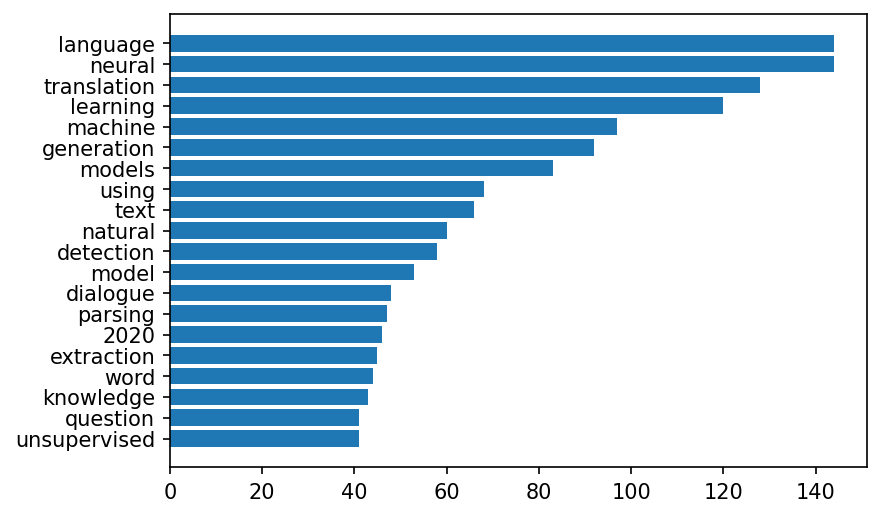

In [18]:
unigrams = [w for w in all_grams[1] if w not in remove_these]
fq_dist_unigrams = FreqDist(unigrams)
c = Counter(fq_dist_unigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)

<BarContainer object of 20 artists>

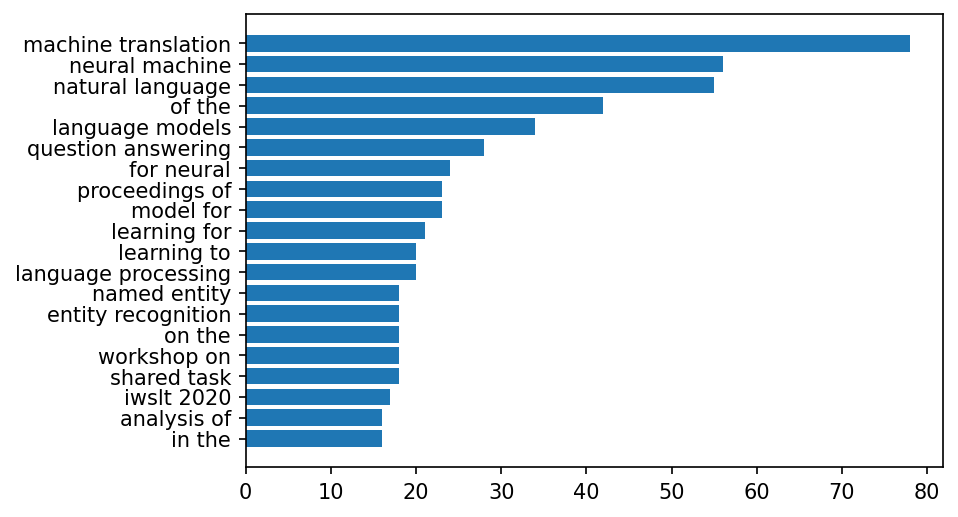

In [16]:
bigrams = [w for w in all_grams[2] if w not in remove_these]
fq_dist_bigrams = FreqDist(bigrams)
c = Counter(fq_dist_bigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)

<BarContainer object of 20 artists>

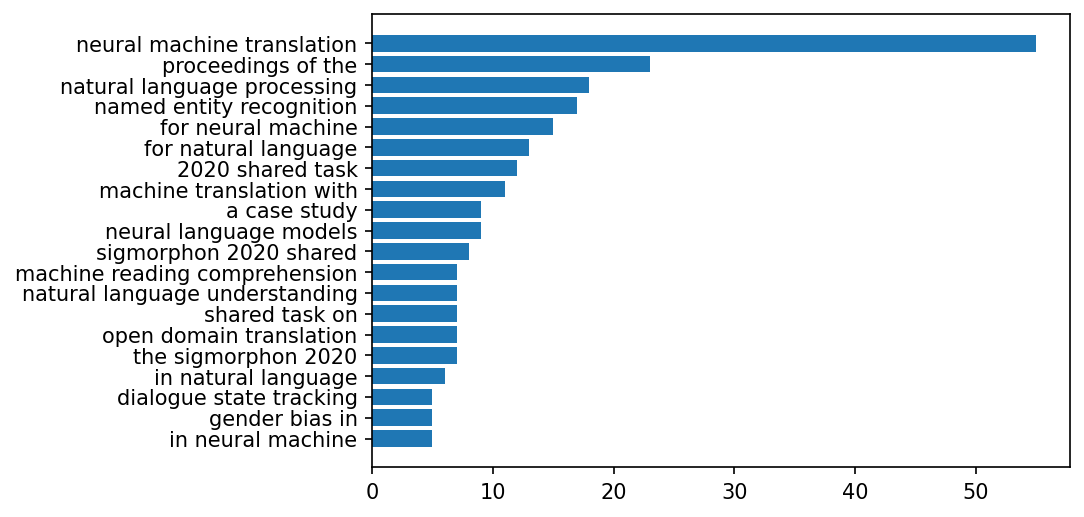

In [17]:

trigrams = [w for w in all_grams[3] if w not in remove_these]
fq_dist_trigrams = FreqDist(trigrams)

c = Counter(fq_dist_trigrams)
grams = []
values = []
number_most_commons = 20
for k, v in c.most_common(number_most_commons):
    grams.append(k)
    values.append(v)
    
grams.reverse()
values.reverse()

fig, ax = plt.subplots()
ax.set_yticks(range(len(grams)))
ax.set_yticklabels(grams)

plt.barh(range(len(grams)), values)